# Times Series with python and /prophet - Dados Anonimizados

In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import numpy as np

## Carregando o dataset

In [29]:
df= pd.read_excel('variavel_A.xlsx')

### Examinando os dados

In [38]:
df.shape

(185, 2)

In [32]:
df.head()

,ds,y
0,2021-02-15,10245.598901
1,2021-02-16,9798.537363
2,2021-02-17,10692.140659
3,2021-02-18,11240.782418
4,2021-02-19,11056.432967


In [33]:
df.tail()

,ds,y
180,2021-08-14,4399.026374
181,2021-08-15,1805.726923
182,2021-08-16,8187.893407
183,2021-08-17,8331.206044
184,2021-08-18,8360.796154


In [34]:
df.count()

ds    185
y     185
dtype: int64

In [36]:
df.describe()

,y
count,185.000000
mean,6267.298661
std,2688.736901
min,1092.060989
25%,4153.260989
50%,7265.941209
75%,7797.901099
max,11240.782418


## Gráfico de séries temporais

In [40]:
import plotly.express as px 

<AxesSubplot:title={'center':'VARIÁVEL A'}, xlabel='ds'>

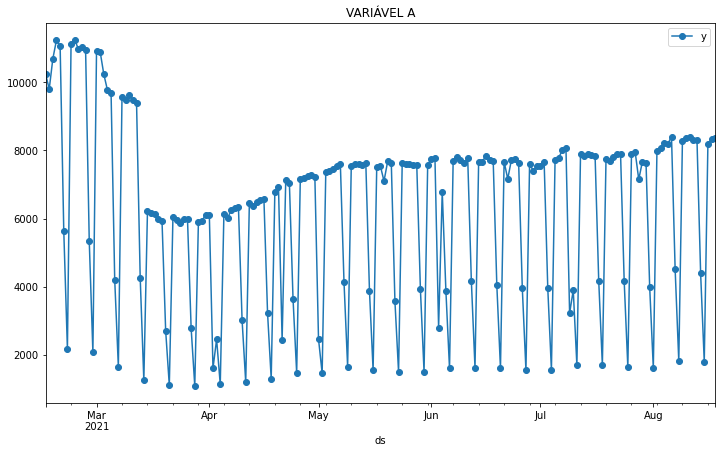

In [43]:
df.plot(x='ds', y='y', figsize=(12, 7), marker = 'o', title='VARIÁVEL A')

## Determinando os dias de feriado para inserir no modelo

In [44]:
holidays = pd.DataFrame({
  'holiday': 'feriado',
  'ds': pd.to_datetime(['2020-09-07','2020-10-12', '2020-11-02', '2020-11-20',
                 '2020-12-24','2020-12-25', '2020-12-31', '2020-12-30','2021-01-01',
                       '2021-04-02','2021-04-21','2021-06-03','2021-07-09']),
  'lower_window': 0,
  'upper_window': 1,
})

In [45]:
holidays

,holiday,ds,lower_window,upper_window
0,feriado,2020-09-07,0,1
1,feriado,2020-10-12,0,1
2,feriado,2020-11-02,0,1
3,feriado,2020-11-20,0,1
4,feriado,2020-12-24,0,1
5,feriado,2020-12-25,0,1
6,feriado,2020-12-31,0,1
7,feriado,2020-12-30,0,1
8,feriado,2021-01-01,0,1
9,feriado,2021-04-02,0,1


## Split into a train/test set

In [47]:
prediction_size = 20
train_df = df[:-prediction_size]

In [48]:
# Initialize and train a model
m = Prophet(daily_seasonality=True, 
            seasonality_mode= 'multiplicative', 
            holidays = holidays)#,
                        #seasonality_prior_scale= 10,
                        #changepoint_prior_scale= 0.5
m.fit(train_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [51]:
train_df.tail()

,ds,y
160,2021-07-25,1643.799451
161,2021-07-26,7886.049451
162,2021-07-27,7966.718681
163,2021-07-28,7150.559341
164,2021-07-29,7669.853846


In [52]:
# Make predictions
future = m.make_future_dataframe(periods=prediction_size)
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,feriado,...,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
180,2021-08-14,1310.299980,3426.451386,4440.683729,1167.475768,1433.259685,3.90693,3.90693,3.90693,0.0,...,2.005923,2.005923,2.005923,-1.901007,-1.901007,-1.901007,0.0,0.0,0.0,3938.660772
181,2021-08-15,1310.906545,1179.212652,1966.702408,1156.847469,1449.724027,3.90693,3.90693,3.90693,0.0,...,0.200430,0.200430,0.200430,-3.706500,-3.706500,-3.706500,0.0,0.0,0.0,1573.651449
182,2021-08-16,1311.513109,6826.172960,8837.078342,1142.463424,1465.259516,3.90693,3.90693,3.90693,0.0,...,5.000977,5.000977,5.000977,1.094047,1.094047,1.094047,0.0,0.0,0.0,7870.359691
183,2021-08-17,1312.119674,6739.609602,8915.683436,1124.482661,1480.777304,3.90693,3.90693,3.90693,0.0,...,4.991244,4.991244,4.991244,1.084314,1.084314,1.084314,0.0,0.0,0.0,7861.228932
184,2021-08-18,1312.726238,6596.218505,9037.924146,1107.851258,1490.996026,3.90693,3.90693,3.90693,0.0,...,5.019161,5.019161,5.019161,1.112230,1.112230,1.112230,0.0,0.0,0.0,7901.510042


In [53]:
# Evaluate the model
def make_comparison_dataframe(historical, forecast):
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))

cmp_df = make_comparison_dataframe(df, forecast)
cmp_df.tail()

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2021-08-14,3938.660772,3426.451386,4440.683729,4399.026374
2021-08-15,1573.651449,1179.212652,1966.702408,1805.726923
2021-08-16,7870.359691,6826.172960,8837.078342,8187.893407
2021-08-17,7861.228932,6739.609602,8915.683436,8331.206044
2021-08-18,7901.510042,6596.218505,9037.924146,8360.796154


In [54]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m, forecast)

In [55]:
plot_components_plotly(m, forecast)

## Avaliação do modelo

In [57]:
def calculate_forecast_errors(df, prediction_size):
    
    df = df.copy()
    
    df['e'] = df['y'] - df['yhat']
    df['p'] = 100 * df['e'] / df['y']
    
    predicted_part = df[-prediction_size:]
    
    error_mean = lambda error_name: np.mean(np.abs(predicted_part[error_name]))
    
    return {'MAPE': error_mean('p'), 'MAE': error_mean('e')}

In [58]:
for err_name, err_value in calculate_forecast_errors(cmp_df, prediction_size).items():
    print(err_name, err_value)

MAPE 5.970170957556834
MAE 346.5313116179895


## Plot forecast with upper and lower bounds

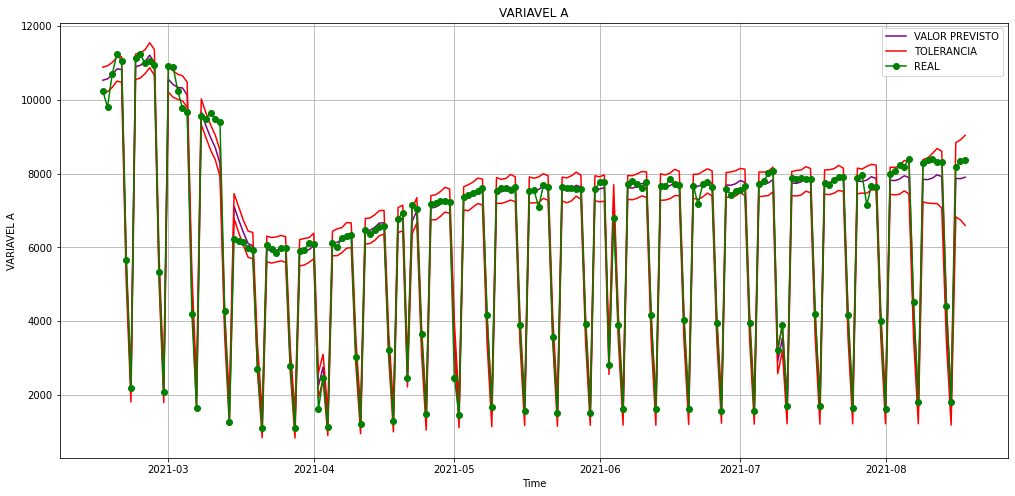

In [59]:
plt.figure(figsize=(17, 8))
plt.plot(cmp_df['yhat'], label = 'VALOR PREVISTO', color='purple')
plt.plot(cmp_df['yhat_lower'], label = 'TOLERANCIA', color='red')
plt.plot(cmp_df['yhat_upper'], color='red')
plt.plot(cmp_df['y'], label = 'REAL', color='green', marker = 'o')
plt.xlabel('Time')
plt.ylabel('VARIAVEL A')
plt.title('VARIAVEL A')
plt.grid(True)
plt.legend()
plt.show()


## Make new predictions

In [65]:
future = m.make_future_dataframe(periods=39)
forecast = m.predict(future)

In [66]:
forecast[['ds','yhat']]

,ds,yhat
0,2021-02-15,10530.797318
1,2021-02-16,10566.208147
2,2021-02-17,10668.177520
3,2021-02-18,10837.846713
4,2021-02-19,10821.624934
...,...,...
199,2021-09-02,8043.055032
200,2021-09-03,7995.373223
201,2021-09-04,3976.949783
202,2021-09-05,1588.942351
